In [3]:
pip install Gitpython

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install pandas as pd

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [13]:
import git
import os

repo_url = "https://github.com/PhonePe/pulse.git"

git.Repo.clone_from(repo_url,"pluse")

print("Cloned successfully ✅")


Cloned successfully ✅


In [14]:
import os
import json
import pandas as pd

#


# ---- PATH (Transaction dataset) ----
path = r"pluse/data/aggregated/transaction/country/india/state"

# ---- Empty dictionary ----
clm = {
    'State': [],
    'Year': [],
    'Quarter': [],
    'Transaction_type': [],
    'Transaction_count': [],
    'Transaction_amount': []
}

# ---- Loop through folders ----
for state in os.listdir(path):
    state_path = os.path.join(path, state)

    for year in os.listdir(state_path):
        year_path = os.path.join(state_path, year)

        for file in os.listdir(year_path):
            file_path = os.path.join(year_path, file)

            try:
                with open(file_path, 'r') as f:
                    data_json = json.load(f)

                # 🔒 Safe check (some files may not contain transactionData)
                if data_json.get('data') and data_json['data'].get('transactionData'):

                    for row in data_json['data']['transactionData']:

                        clm['State'].append(state)
                        clm['Year'].append(year)
                        clm['Quarter'].append(file.replace('.json',''))
                        clm['Transaction_type'].append(row['name'])
                        clm['Transaction_count'].append(row['paymentInstruments'][0]['count'])
                        clm['Transaction_amount'].append(row['paymentInstruments'][0]['amount'])

            except Exception as e:
                print("Error in:", file_path)
                continue




# Read CSV
Agg_Transaction = pd.DataFrame(clm)

# Clean state name (specific replace)
Agg_Transaction["State"] = Agg_Transaction["State"].str.replace(
    "andaman-&-nicobar-islands",
    "Andaman & Nicobar",
    regex=False
)

# General cleaning
Agg_Transaction["State"] = (
    Agg_Transaction["State"]
    .str.replace("-", " ")
    .str.title()
    .str.strip()
)

print("Rows extracted:", len(Agg_Transaction))
print(Agg_Transaction.head().to_string())
Agg_Transaction.to_csv("Agg_Transaction.csv", index=False)
print("CSV Saved ✅")







Rows extracted: 5034
               State  Year Quarter          Transaction_type  Transaction_count  Transaction_amount
0  Andaman & Nicobar  2018       1  Recharge & bill payments               4200        1.845307e+06
1  Andaman & Nicobar  2018       1     Peer-to-peer payments               1871        1.213866e+07
2  Andaman & Nicobar  2018       1         Merchant payments                298        4.525072e+05
3  Andaman & Nicobar  2018       1        Financial Services                 33        1.060142e+04
4  Andaman & Nicobar  2018       1                    Others                256        1.846899e+05
CSV Saved ✅


In [7]:
import os
import json
import pandas as pd


path = r"pulse/data/aggregated/insurance/country/india/state"

clm = {
    'State': [],
    'Year': [],
    'Quarter': [],
    'From_Timestamp': [],
    'To_Timestamp': [],
    'Insurance_Type': [],
    'Insurance_Count': [],
    'Insurance_Amount': []
}

for state in os.listdir(path):
    state_path = os.path.join(path, state)

    for year in os.listdir(state_path):
        year_path = os.path.join(state_path, year)

        for file in os.listdir(year_path):
            file_path = os.path.join(year_path, file)

            try:
                with open(file_path, 'r') as f:
                    data_json = json.load(f)

                if not data_json.get('data'):
                    continue

                # ---------- From / To Timestamp ----------
                from_ts = data_json['data'].get('from')
                to_ts = data_json['data'].get('to')

                # ---------- Transaction Data ----------
                trans_list = data_json['data'].get('transactionData')
                if not trans_list:
                    continue

                for row in trans_list:
                    ins_type = row.get('name')
                    count = row['paymentInstruments'][0].get('count')
                    amount = row['paymentInstruments'][0].get('amount')

                    clm['State'].append(state)
                    clm['Year'].append(year)
                    clm['Quarter'].append(file.replace('.json', ''))
                    clm['From_Timestamp'].append(from_ts)
                    clm['To_Timestamp'].append(to_ts)
                    clm['Insurance_Type'].append(ins_type)
                    clm['Insurance_Count'].append(count)
                    clm['Insurance_Amount'].append(amount)

            except Exception as e:
                print("Error in:", file_path)
                continue

Agg_Insurance = pd.DataFrame(clm)


# Clean state name
Agg_Insurance["State"] = Agg_Insurance["State"].str.replace(
    "andaman-&-nicobar-islands",
    "Andaman & Nicobar",
    regex=False
)

print("Rows extracted:", len(Agg_Insurance))
print(Agg_Insurance.head().to_string())

Agg_Insurance["State"] = (
    Agg_Insurance["State"]
    .str.replace("-", " ")
    .str.title()
    .str.strip()
)
Agg_Insurance.to_csv("Agg_Insurance.csv", index=False)
print("CSV Saved ✅")





Rows extracted: 682
               State  Year Quarter  From_Timestamp   To_Timestamp Insurance_Type  Insurance_Count  Insurance_Amount
0  Andaman & Nicobar  2020       2   1585679400000  1593282600000      Insurance                6            1360.0
1  Andaman & Nicobar  2020       3   1593541800000  1601231400000      Insurance               41           15380.0
2  Andaman & Nicobar  2020       4   1601490600000  1609093800000      Insurance              124          157975.0
3  Andaman & Nicobar  2021       1   1609439400000  1616869800000      Insurance              225          244266.0
4  Andaman & Nicobar  2021       2   1617215400000  1624818600000      Insurance              137          181504.0
CSV Saved ✅


In [ ]:
import os
import json
import pandas as pd

path = r"plus/data/aggregated/user/country/india/state"

clm = {
    'State': [],
    'Year': [],
    'Quarter': [],
    'Brand': [],
    'Registered_Users': [],
    'Percentage': [],
    'App_Opens': []
}

for state in os.listdir(path):
    state_path = os.path.join(path, state)

    for year in os.listdir(state_path):
        year_path = os.path.join(state_path, year)

        for file in os.listdir(year_path):

            if not file.endswith(".json"):
                continue

            file_path = os.path.join(year_path, file)

            try:
                with open(file_path, 'r') as f:
                    data_json = json.load(f)

                # Skip if no data
                if data_json.get("data") is None:
                    continue

                users = data_json["data"].get("usersByDevice")

                # Skip if usersByDevice is None
                if not users:
                    continue

                App_opens = data_json["data"].get("aggregated", {}).get("appOpens", 0)
                quarter = int(file.replace(".json", ""))

                for row in users:
                    clm['State'].append(state)
                    clm['Year'].append(int(year))
                    clm['Quarter'].append(quarter)
                    clm['Brand'].append(row.get('brand'))
                    clm['Registered_Users'].append(row.get('count', 0))
                    clm['Percentage'].append(round(row.get('percentage', 0) * 100, 2))
                    clm['App_Opens'].append(App_opens)

            except Exception:
                continue

Agg_user = pd.DataFrame(clm)

print("Rows extracted:", len(Agg_user))
print(Agg_user.head())


Rows extracted: 6732
                       State  Year  Quarter    Brand  Registered_Users  \
0  andaman-&-nicobar-islands  2018        1   Xiaomi              1665   
1  andaman-&-nicobar-islands  2018        1  Samsung              1445   
2  andaman-&-nicobar-islands  2018        1     Vivo               982   
3  andaman-&-nicobar-islands  2018        1     Oppo               501   
4  andaman-&-nicobar-islands  2018        1  OnePlus               332   

   Percentage  App_Opens  
0       24.70          0  
1       21.44          0  
2       14.57          0  
3        7.43          0  
4        4.93          0  


In [ ]:
import os
import json
import pandas as pd

path = r"pulse/data/map/transaction/hover/country/india/state"


clm = {
    'State': [],
    'Year': [],
    'Quarter': [],
    'District': [],
    'Transaction_count': [],
    'Transaction_amount': []
}

# 👉 Loop states
for state in os.listdir(path):
    state_path = os.path.join(path, state)

    for year in os.listdir(state_path):
        year_path = os.path.join(state_path, year)

        for file in os.listdir(year_path):
            file_path = os.path.join(year_path, file)

            try:
                with open(file_path, 'r') as f:
                    data_json = json.load(f)

                # skip empty JSON
                if not data_json.get('data'):
                    continue

                hover_list = data_json['data'].get('hoverDataList')
                if not hover_list:
                    continue

                # hoverDataList is list
                for row in hover_list:
                    district = row['name']
                    count = row['metric'][0]['count']
                    amount = row['metric'][0]['amount']

                    clm['State'].append(state)
                    clm['Year'].append(year)
                    clm['Quarter'].append(file.replace('.json', ''))
                    clm['District'].append(district)
                    clm['Transaction_count'].append(count)
                    clm['Transaction_amount'].append(amount)

            except Exception as e:
                print("Error in:", file_path)
                continue



Map_Transaction_Hover = pd.DataFrame(clm)
Map_Transaction_Hover["State"] = Map_Transaction_Hover["State"].str.replace(
    "andaman-&-nicobar-islands",
    "Andaman & Nicobar",
    regex=False
)

print("Rows extracted:", len(Map_Transaction_Hover))
print("Shape 👉", Map_Transaction_Hover.shape)
print(Map_Transaction_Hover.head())

Map_Transaction_Hover["State"] = (
    Map_Transaction_Hover["State"]
    .str.replace("-", " ")
    .str.title()
    .str.strip()
)




CSV Saved ✅
Rows extracted: 20604
Shape 👉 (20604, 6)
               State  Year Quarter                           District  \
0  Andaman & Nicobar  2018       1  north and middle andaman district   
1  Andaman & Nicobar  2018       1             south andaman district   
2  Andaman & Nicobar  2018       1                  nicobars district   
3  Andaman & Nicobar  2018       2  north and middle andaman district   
4  Andaman & Nicobar  2018       2             south andaman district   

   Transaction_count  Transaction_amount  
0                442        9.316631e+05  
1               5688        1.256025e+07  
2                528        1.139849e+06  
3                825        1.317863e+06  
4               9395        2.394824e+07  


In [ ]:
import os
import json
import pandas as pd


path = r"pulse/data/map/user/hover/country/india/state"


clm = {
    'State': [],
    'Year': [],
    'Quarter': [],
    'District': [],
    'Registered_Users': [],
    'App_Opens': []
}


for state in os.listdir(path):
    state_path = os.path.join(path, state)

    for year in os.listdir(state_path):
        year_path = os.path.join(state_path, year)

        for file in os.listdir(year_path):
            file_path = os.path.join(year_path, file)

            try:
                with open(file_path, 'r') as f:
                    data_json = json.load(f)

                # skip empty JSON
                if not data_json.get('data'):
                    continue

                hover = data_json['data'].get('hoverData')
                if not hover:
                    continue

                # hoverData is dictionary
                for district in hover:
                    users = hover[district]['registeredUsers']
                    opens = hover[district]['appOpens']

                    clm['State'].append(state)
                    clm['Year'].append(year)
                    clm['Quarter'].append(file.replace('.json', ''))
                    clm['District'].append(district)
                    clm['Registered_Users'].append(users)
                    clm['App_Opens'].append(opens)

            except Exception as e:
                print("Error in:", file_path)
                continue


Map_User_Hover = pd.DataFrame(clm)


print("Rows extracted:", len(Map_User_Hover))
print(Map_User_Hover.head().to_string())

Rows extracted: 20608
                       State  Year Quarter                           District  Registered_Users  App_Opens
0  andaman-&-nicobar-islands  2018       1  north and middle andaman district               632          0
1  andaman-&-nicobar-islands  2018       1             south andaman district              5846          0
2  andaman-&-nicobar-islands  2018       1                  nicobars district               262          0
3  andaman-&-nicobar-islands  2018       2  north and middle andaman district               911          0
4  andaman-&-nicobar-islands  2018       2             south andaman district              8143          0


In [7]:
import pandas as pd
import json
import os

path = r"pulse/data/map/insurance/hover/country/india/state"

clm = {
    'State': [],
    'Year': [],
    'Quarter': [],
    'District': [],
    'Insurance_count': [],
    'Insurance_amount': []
}

for state in os.listdir(path):

    state_path = os.path.join(path, state)

    for year in os.listdir(state_path):
        year_path = os.path.join(state_path, year)

        for file in os.listdir(year_path):
            file_path = os.path.join(year_path, file)

            try:
                with open(file_path, 'r') as f:
                    data_json = json.load(f)

                # skip empty JSON
                if not data_json.get('data'):
                    continue

                hover_list = data_json['data'].get('hoverDataList')
                if not hover_list:
                    continue

                # hoverDataList is list
                for row in hover_list:
                    district = row['name']
                    count = row['metric'][0]['count']
                    amount = row['metric'][0]['amount']

                    clm['State'].append(state)
                    clm['Year'].append(year)
                    clm['Quarter'].append(file.replace('.json', ''))
                    clm['District'].append(district)
                    clm['Insurance_count'].append(count)
                    clm['Insurance_amount'].append(amount)

            except Exception as e:
                print("Error in:", file_path)
                continue

map_insurance = pd.DataFrame(clm)
map_insurance["State"] = map_insurance["State"].str.replace(
    "andaman-&-nicobar-islands",
    "Andaman & Nicobar",
    regex=False
)

print("Rows extracted:", len(map_insurance))
print(map_insurance.head().to_string())

map_insurance["State"] = (
    map_insurance["State"]
    .str.replace("-", " ")
    .str.title()
    .str.strip()
)

Rows extracted: 13876
               State  Year Quarter                           District  Insurance_count  Insurance_amount
0  Andaman & Nicobar  2020       2             south andaman district                3             795.0
1  Andaman & Nicobar  2020       2                  nicobars district                3             565.0
2  Andaman & Nicobar  2020       3  north and middle andaman district                1             281.0
3  Andaman & Nicobar  2020       3             south andaman district               35           13651.0
4  Andaman & Nicobar  2020       3                  nicobars district                5            1448.0


In [ ]:
import os
import json
import pandas as pd

# 👉 Correct path (NO /state)
path = r"pulse/data/top/user/country/india/state"

# ---------- STATE ----------
state_clm = {
    'Year': [],
    'Quarter': [],
    'State': [],
    'Registered_Users': []
}

# ---------- DISTRICT ----------
district_clm = {
    'Year': [],
    'Quarter': [],
    'District': [],
    'Registered_Users': []
}

# ---------- PINCODE ----------
pincode_clm = {
    'Year': [],
    'Quarter': [],
    'Pincode': [],
    'Registered_Users': []
}

# ---------- LOOP ----------
for year in os.listdir(path):
    year_path = os.path.join(path, year)

    for file in os.listdir(year_path):
        if not file.endswith(".json"):
            continue

        file_path = os.path.join(year_path, file)

        try:
            with open(file_path, 'r') as f:
                data_json = json.load(f)

            data = data_json.get('data')
            if not data:
                continue

            quarter = file.replace(".json", "")

            # ---------- STATES ----------
            for row in data.get('states') or []:
                state_clm['Year'].append(year)
                state_clm['Quarter'].append(quarter)
                state_clm['State'].append(row.get('name'))
                state_clm['Registered_Users'].append(row.get('registeredUsers'))

            # ---------- DISTRICTS ----------
            for row in data.get('districts') or []:
                district_clm['Year'].append(year)
                district_clm['Quarter'].append(quarter)
                district_clm['District'].append(row.get('name'))
                district_clm['Registered_Users'].append(row.get('registeredUsers'))

            # ---------- PINCODES ----------
            for row in data.get('pincodes') or []:
                pincode_clm['Year'].append(year)
                pincode_clm['Quarter'].append(quarter)
                pincode_clm['Pincode'].append(row.get('name'))
                pincode_clm['Registered_Users'].append(row.get('registeredUsers'))

        except Exception as e:
            print("Error in:", file_path, "|", e)

# ---------- DATAFRAMES ----------
Top_User_States = pd.DataFrame(state_clm)
Top_User_Districts = pd.DataFrame(district_clm)
Top_User_Pincodes = pd.DataFrame(pincode_clm)

# ---------- OUTPUT ----------
print("State rows:", len(Top_User_States))
print(Top_User_States.head().to_string())

print("\nDistrict rows:", len(Top_User_Districts))
print(Top_User_Districts.head().to_string())

print("\nPincode rows:", len(Top_User_Pincodes))
print(Top_User_Pincodes.head().to_string())



State rows: 0
Empty DataFrame
Columns: [Year, Quarter, State, Registered_Users]
Index: []

District rows: 0
Empty DataFrame
Columns: [Year, Quarter, District, Registered_Users]
Index: []

Pincode rows: 0
Empty DataFrame
Columns: [Year, Quarter, Pincode, Registered_Users]
Index: []


In [ ]:
import os
import json
import pandas as pd

# -------- PATH --------
path = r"C:\project\pulse\data\pulse\data\pluse\data\top\transaction\country\india\state"

# -------- STATE --------
state_clm = {
    'Year': [],
    'Quarter': [],
    'State': [],
    'Transaction_Count': [],
    'Transaction_Amount': []
}

# -------- DISTRICT --------
district_clm = {
    'Year': [],
    'Quarter': [],
    'District': [],
    'Transaction_Count': [],
    'Transaction_Amount': []
}

# -------- PINCODE --------
pincode_clm = {
    'Year': [],
    'Quarter': [],
    'Pincode': [],
    'Transaction_Count': [],
    'Transaction_Amount': []
}

# -------- LOOP --------
for state in os.listdir(path):
    state_path = os.path.join(path, state)

    for year in os.listdir(state_path):
        year_path = os.path.join(state_path, year)

        for file in os.listdir(year_path):

            if not file.endswith(".json"):
                continue

            file_path = os.path.join(year_path, file)

            try:
                with open(file_path, 'r') as f:
                    data_json = json.load(f)

                if data_json.get("data") is None:
                    continue

                quarter = int(file.replace(".json", ""))

                # -------- STATES --------
                for row in data_json["data"].get("states", []):
                    state_clm['Year'].append(int(year))
                    state_clm['Quarter'].append(quarter)
                    state_clm['State'].append(row.get("entityName"))
                    state_clm['Transaction_Count'].append(row.get("metric", {}).get("count", 0))
                    state_clm['Transaction_Amount'].append(row.get("metric", {}).get("amount", 0))

                # -------- DISTRICTS --------
                for row in data_json["data"].get("districts", []):
                    district_clm['Year'].append(int(year))
                    district_clm['Quarter'].append(quarter)
                    district_clm['District'].append(row.get("entityName"))
                    district_clm['Transaction_Count'].append(row.get("metric", {}).get("count", 0))
                    district_clm['Transaction_Amount'].append(row.get("metric", {}).get("amount", 0))

                # -------- PINCODES --------
                for row in data_json["data"].get("pincodes", []):
                    pincode_clm['Year'].append(int(year))
                    pincode_clm['Quarter'].append(quarter)
                    pincode_clm['Pincode'].append(row.get("entityName"))
                    pincode_clm['Transaction_Count'].append(row.get("metric", {}).get("count", 0))
                    pincode_clm['Transaction_Amount'].append(row.get("metric", {}).get("amount", 0))

            except Exception as e:
                print("Error:", file_path, e)

# -------- DATAFRAMES --------
Top_Transaction_States = pd.DataFrame(state_clm)
Top_Transaction_Districts = pd.DataFrame(district_clm)
Top_Transaction_Pincodes = pd.DataFrame(pincode_clm)

# -------- OUTPUT --------
print("State rows:", len(Top_Transaction_States))
print(Top_Transaction_States.head())

print("\nDistrict rows:", len(Top_Transaction_Districts))
print(Top_Transaction_Districts.head())

print("\nPincode rows:", len(Top_Transaction_Pincodes))
print(Top_Transaction_Pincodes.head())


In [ ]:
import os
import json
import pandas as pd

path = r"pulse/data/top/insurance/country/india/state"

state_clm = {
    'Year': [],
    'Quarter': [],
    'State': [],
    'Insurance_Count': [],
    'Insurance_Amount': []
}

district_clm = {
    'Year': [],
    'Quarter': [],
    'District': [],
    'Insurance_Count': [],
    'Insurance_Amount': []
}

pincode_clm = {
    'Year': [],
    'Quarter': [],
    'Pincode': [],
    'Insurance_Count': [],
    'Insurance_Amount': []
}

for year in os.listdir(path):
    year_path = os.path.join(path, year)

    for file in os.listdir(year_path):

        if not file.endswith(".json"):
            continue

        file_path = os.path.join(year_path, file)

        with open(file_path, 'r') as f:
            data_json = json.load(f)

        data = data_json.get('data')
        if not data:
            continue

        quarter = file.replace(".json", "")

        # ---------- STATES ----------
        for row in data.get('states') or []:
            state_clm['Year'].append(year)
            state_clm['Quarter'].append(quarter)
            state_clm['State'].append(row.get('entityName'))
            state_clm['Insurance_Count'].append(row['metric'].get('count'))
            state_clm['Insurance_Amount'].append(row['metric'].get('amount'))

        # ---------- DISTRICTS ----------
        for row in data.get('districts') or []:
            district_clm['Year'].append(year)
            district_clm['Quarter'].append(quarter)
            district_clm['District'].append(row.get('entityName'))
            district_clm['Insurance_Count'].append(row['metric'].get('count'))
            district_clm['Insurance_Amount'].append(row['metric'].get('amount'))

        # ---------- PINCODES ----------
        for row in data.get('pincodes') or []:
            pincode_clm['Year'].append(year)
            pincode_clm['Quarter'].append(quarter)
            pincode_clm['Pincode'].append(row.get('entityName'))
            pincode_clm['Insurance_Count'].append(row['metric'].get('count'))
            pincode_clm['Insurance_Amount'].append(row['metric'].get('amount'))

Top_Insurance_States = pd.DataFrame(state_clm)
Top_Insurance_Districts = pd.DataFrame(district_clm)
Top_Insurance_Pincodes = pd.DataFrame(pincode_clm)

print("State rows:", len(Top_Insurance_States))
print(Top_Insurance_States.head().to_string())
print("District rows:", len(Top_Insurance_Districts))
print(Top_Insurance_Districts.head().to_string())
print("Pincode rows:", len(Top_Insurance_Pincodes))
print(Top_Insurance_Pincodes.head().to_string())


State rows: 0
Empty DataFrame
Columns: [Year, Quarter, State, Insurance_Count, Insurance_Amount]
Index: []
District rows: 0
Empty DataFrame
Columns: [Year, Quarter, District, Insurance_Count, Insurance_Amount]
Index: []
Pincode rows: 0
Empty DataFrame
Columns: [Year, Quarter, Pincode, Insurance_Count, Insurance_Amount]
Index: []


In [1]:
pip install psycopg2


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#1. Decoding Transaction Dynamics on PhonePe

import psycopg2

mydb = psycopg2.connect(
    host="localhost",
    database="phonepe_data",
    user="postgres",
    password="root",
    port="5432"
)
print("✅ Connected Successfully")

cursor = mydb.cursor()

✅ Connected Successfully


C:\Users\Lavanyasathish\AppData\Local\Temp\ipykernel_16300\1727993260.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, mydb)


                       state  year quarter          transaction_type  \
0  andaman-&-nicobar-islands  2018       1     Peer-to-peer payments   
1  andaman-&-nicobar-islands  2018       1                    Others   
2  andaman-&-nicobar-islands  2018       2                    Others   
3  andaman-&-nicobar-islands  2018       3  Recharge & bill payments   
4  andaman-&-nicobar-islands  2018       3     Peer-to-peer payments   

   transaction_count  transaction_amount  
0               1871            12138655  
1                256              184690  
2                368              359839  
3               8636             4343505  
4               6448            49270782  
state
telangana         41655955630079
karnataka         40678721773664
maharashtra       40374195687968
andhra-pradesh    34669080454849
uttar-pradesh     26885212184901
rajasthan         26343235566264
madhya-pradesh    19125279433026
bihar             17901349344780
west-bengal       15584164309416
odisha

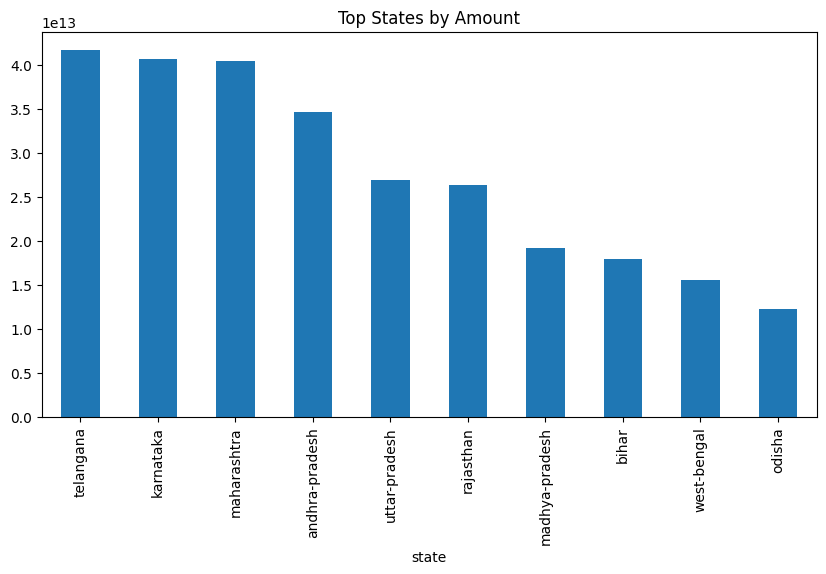

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

query = "SELECT * FROM Agg_Transaction"
df = pd.read_sql(query, mydb)

print(df.head())

#Top States
top_states = df.groupby("state")["transaction_amount"].sum().sort_values(ascending=False).head(10)
print(top_states)
top_states.plot(kind="bar", figsize=(10,5), title="Top States by Amount")
plt.show()


quarter
1     73355233114167
2     82024231029534
3     88233138211675
4    101909692480023
Name: transaction_amount, dtype: int64


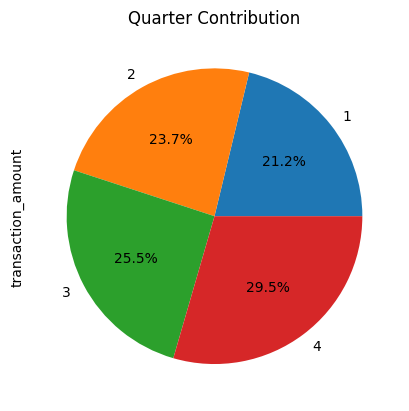

In [9]:
#Quarter Performance
quarter_perf = df.groupby("quarter")["transaction_amount"].sum()
print(quarter_perf)

quarter_perf.plot(kind="pie", autopct="%1.1f%%", title="Quarter Contribution")
plt.show()

transaction_type
Peer-to-peer payments       266527358971207
Merchant payments            65339877074738
Recharge & bill payments     13338759360284
Others                         174280661978
Financial Services             142018767192
Name: transaction_amount, dtype: int64


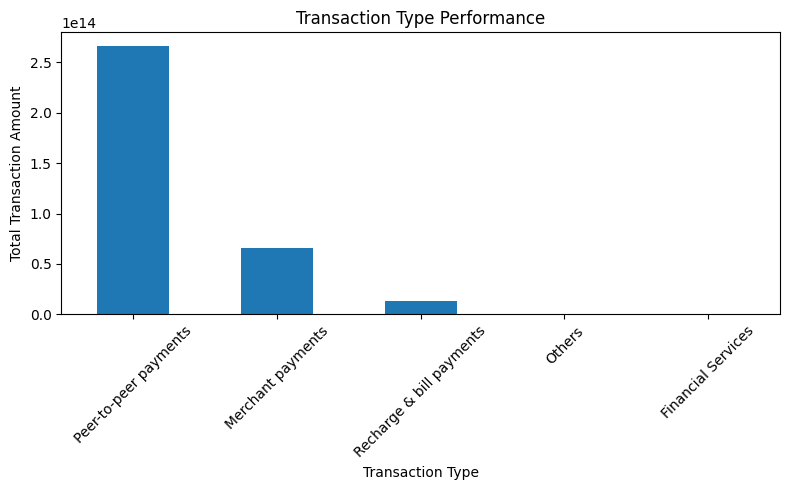

In [16]:
#Transaction Type

txn_type = df.groupby("transaction_type")["transaction_amount"].sum().sort_values(ascending=False)
print(txn_type)
plt.figure(figsize=(8,5))
txn_type.plot(kind="bar")

plt.title("Transaction Type Performance")
plt.xlabel("Transaction Type")
plt.ylabel("Total Transaction Amount")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

year
2018      1623045396424
2019      6276688133187
2020     14641161978067
2021     34598699687169
2022     64266332910901
2023     94491813399121
2024    129624553330530
Name: transaction_amount, dtype: int64


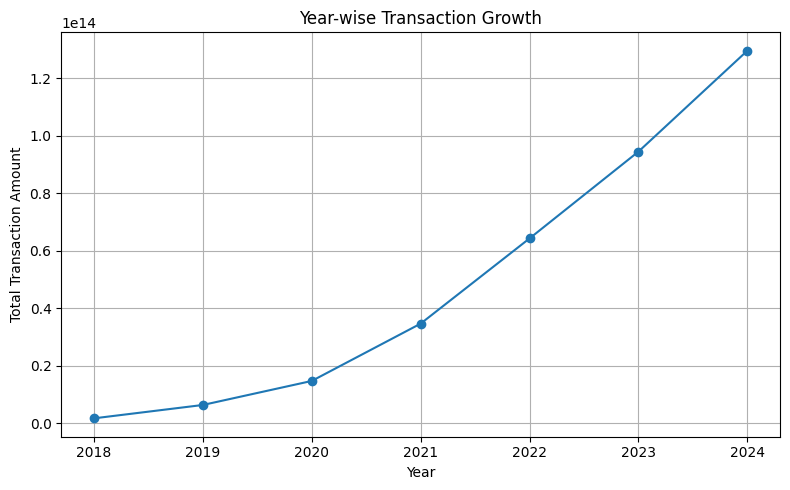

In [ ]:
#year growth

growth = df.groupby("year")["transaction_amount"].sum()
print(growth)


plt.figure(figsize=(8,5))
growth.plot(marker='o')

plt.title("Year-wise Transaction Growth")
plt.xlabel("Year")
plt.ylabel("Total Transaction Amount")
plt.grid(True)
plt.tight_layout()

plt.show()



Declining Regions:
          state  year        Growth
40   chandigarh  2023 -2.195069e+10
152     manipur  2023 -3.661675e+10
Stagnant Regions:
Empty DataFrame
Columns: [state, year]
Index: []


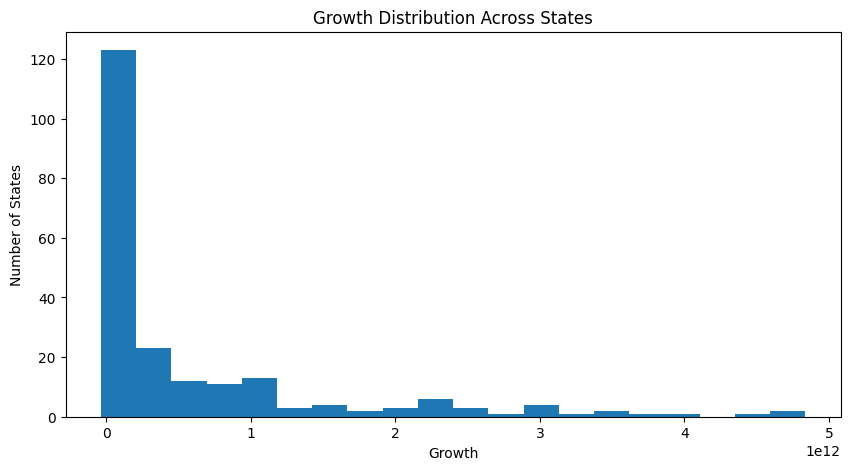

In [21]:
#Decline / Stagnation Detection
state_year = df.groupby(["state","year"])["transaction_amount"].sum().reset_index()
state_year = state_year.sort_values(["state","year"])
state_year["Prev_Year"] = state_year.groupby("state")["transaction_amount"].shift(1)
state_year["Growth"] = state_year["transaction_amount"] - state_year["Prev_Year"]

decline = state_year[state_year["Growth"] < 0]
print("Declining Regions:")
print(decline[["state","year","Growth"]])


stagnant = state_year[state_year["Growth"] == 0]
print("Stagnant Regions:")
print(stagnant[["state","year"]])
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(state_year["Growth"].dropna(), bins=20)
plt.title("Growth Distribution Across States")
plt.xlabel("Growth")
plt.ylabel("Number of States")
plt.show()


In [3]:
#Case Study 2 – Device Dominance & User Engagement 😎
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2

conn = psycopg2.connect(
    host="localhost",
    database="phonepe_data",
    user="postgres",
    password="root",
    port="5432"
)

query = "SELECT * FROM agg_user"
df = pd.read_sql(query, mydb)

print(df.head())




                       state  year  quarter    brand  registered_users  \
0  andaman-&-nicobar-islands  2018        1   Xiaomi              1665   
1  andaman-&-nicobar-islands  2018        1  Samsung              1445   
2  andaman-&-nicobar-islands  2018        1     Vivo               982   
3  andaman-&-nicobar-islands  2018        1     Oppo               501   
4  andaman-&-nicobar-islands  2018        1  OnePlus               332   

   app_opens  percentage  
0          0       24.70  
1          0       21.44  
2          0       14.57  
3          0        7.43  
4          0        4.93  


C:\Users\Lavanyasathish\AppData\Local\Temp\ipykernel_21272\2414886873.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, mydb)



Top Device Brands:
brand
Xiaomi     869562617
Samsung    671603711
Vivo       625415019
Oppo       420250245
Others     282950234
Name: registered_users, dtype: int64


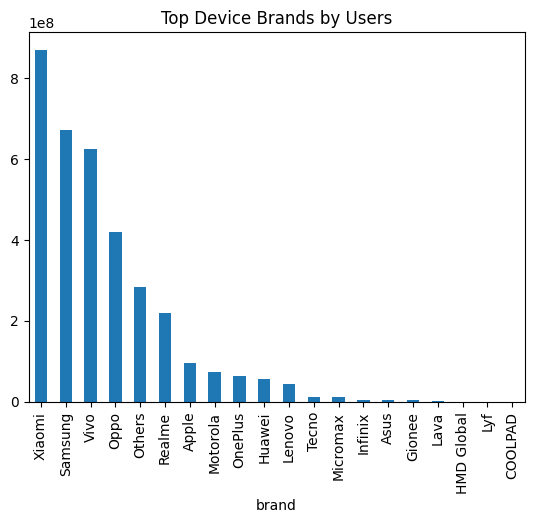

In [8]:
# ---------------- TOP DEVICE BRAND ----------------
top_brand = (
    df.groupby("brand")["registered_users"]
    .sum()
    .sort_values(ascending=False)
)

print("\nTop Device Brands:")
print(top_brand.head())

top_brand.plot(kind="bar", title="Top Device Brands by Users")
plt.show()


Brand Engagement:
            registered_users    app_opens  engagement_rate
brand                                                     
HMD Global            336632    906168456      2691.866656
Tecno               12388623  31818603398      2568.372885
Infinix              5142870   9494116101      1846.073516
Huawei              57129693  88424845540      1547.791366
Lava                 1530109   2306042775      1507.110131
Lenovo              42564548  60117510485      1412.384562
Gionee               3082772   4182563578      1356.754109
OnePlus             63677211  77925898204      1223.764310
Motorola            73340734  88529569238      1207.099580
Asus                 4295498   3965320634       923.134089
Apple               95947314  84675446358       882.520238
Micromax            11132859   9734937478       874.432837
Realme             219973222  92416204449       420.124793
Others             282950234  92416204449       326.616462
Oppo               420250245  9241620

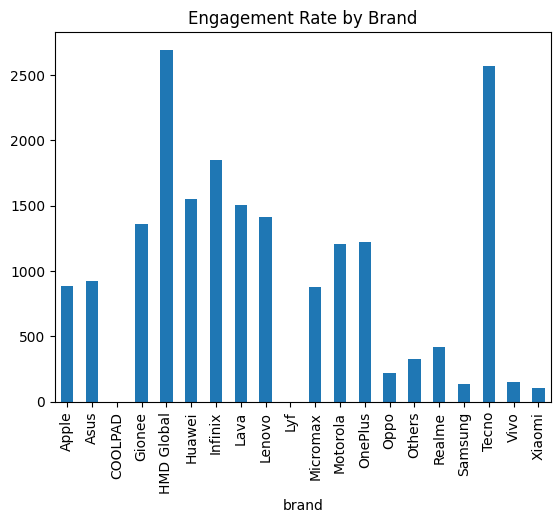

In [9]:
# ---------------- ENGAGEMENT RATE ----------------
brand_engagement = (
    df.groupby("brand")[["registered_users", "app_opens"]]
    .sum()
)

brand_engagement["engagement_rate"] = (
    brand_engagement["app_opens"] / brand_engagement["registered_users"]
)

print("\nBrand Engagement:")
print(brand_engagement.sort_values("engagement_rate", ascending=False))

brand_engagement["engagement_rate"].plot(
    kind="bar", title="Engagement Rate by Brand"
)
plt.show()




State-wise Device Usage:
                        state     brand  registered_users
11  andaman-&-nicobar-islands    Xiaomi            148752
10  andaman-&-nicobar-islands      Vivo            141104
8   andaman-&-nicobar-islands   Samsung            114622
5   andaman-&-nicobar-islands      Oppo             54448
6   andaman-&-nicobar-islands    Others             47353
7   andaman-&-nicobar-islands    Realme             39953
4   andaman-&-nicobar-islands   OnePlus             23399
1   andaman-&-nicobar-islands    Huawei             15964
0   andaman-&-nicobar-islands     Apple             13741
3   andaman-&-nicobar-islands  Motorola             12613
9   andaman-&-nicobar-islands     Tecno              6135
2   andaman-&-nicobar-islands    Lenovo              5362
22             andhra-pradesh    Xiaomi          56579876
20             andhra-pradesh   Samsung          43755288
21             andhra-pradesh      Vivo          39277268
17             andhra-pradesh      Oppo       

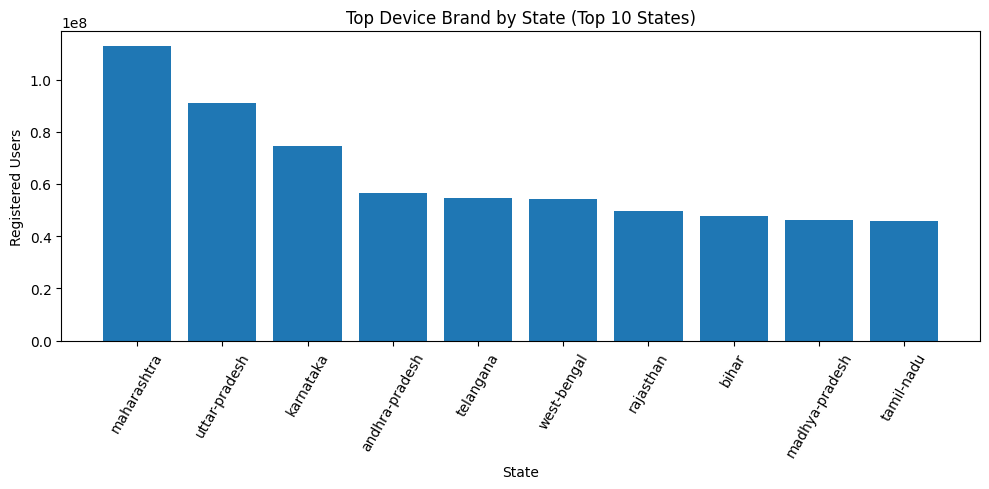

In [16]:
# ---------------- STATE-WISE DEVICE ----------------
state_brand = (
    df.groupby(["state", "brand"])["registered_users"]
    .sum()
    .reset_index()
    .sort_values(["state", "registered_users"], ascending=[True, False])
)

print("\nState-wise Device Usage:")
print(state_brand.head(20))

top_state_brand = (
    state_brand.groupby("state")
    .first()
    .reset_index()
)

# Show only top 10 states
top10_state = top_state_brand.sort_values(
    "registered_users", ascending=False
).head(10)

plt.figure(figsize=(10,5))
plt.bar(top10_state["state"], top10_state["registered_users"])
plt.title("Top Device Brand by State (Top 10 States)")
plt.ylabel("Registered Users")
plt.xlabel("State")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()



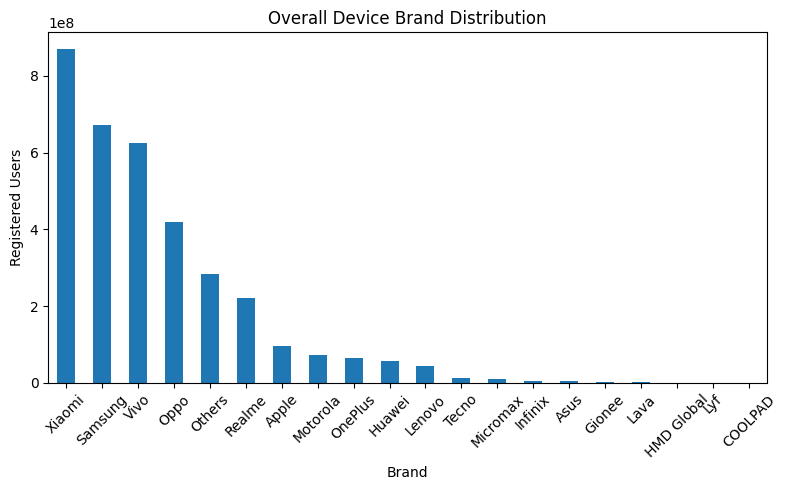

In [20]:
#Brand Distribution (Overall)
brand_dist = (
    df.groupby("brand")["registered_users"]
    .sum()
    .sort_values(ascending=False)
)

brand_dist.plot(
    kind="bar",
    title="Overall Device Brand Distribution",
    figsize=(8,5)
)
plt.ylabel("Registered Users")
plt.xlabel("Brand")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [22]:
#Transaction Analysis for Market Expansion
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
plt.style.use("ggplot")

# ---------------- DATABASE ----------------
conn = psycopg2.connect(
    host="localhost",
    database="phonepe_data",
    user="postgres",
    password="root",
    port="5432"
)

df = pd.read_sql("SELECT * FROM Agg_Transaction", conn)
conn.close()

print("Data Loaded ✅")

Data Loaded ✅


C:\Users\Lavanyasathish\AppData\Local\Temp\ipykernel_21272\568878935.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM Agg_Transaction", conn)



Top Performing States:
state
telangana         41655955630079
karnataka         40678721773664
maharashtra       40374195687968
andhra-pradesh    34669080454849
uttar-pradesh     26885212184901
rajasthan         26343235566264
madhya-pradesh    19125279433026
bihar             17901349344780
west-bengal       15584164309416
odisha            12263982051527
Name: transaction_amount, dtype: int64


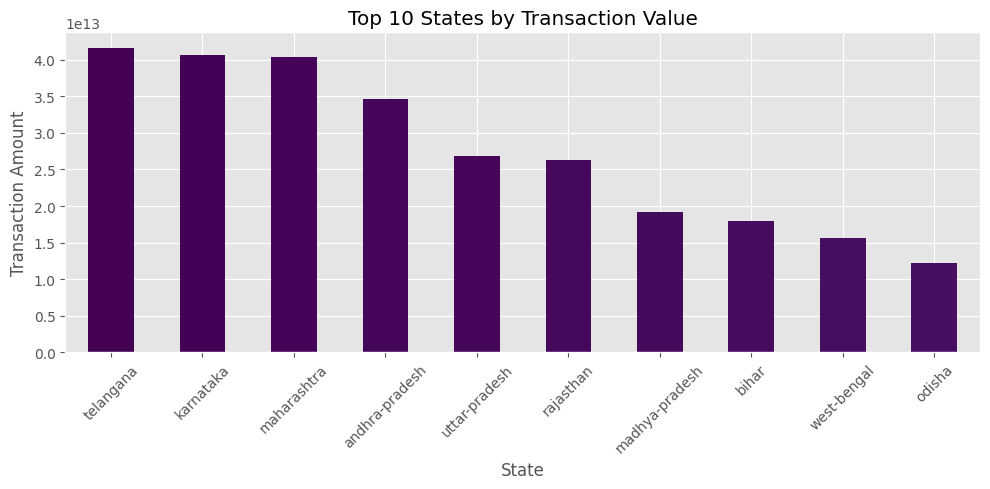

In [23]:
# ---------------- TOP STATES ----------------
top_states = (
    df.groupby("state")["transaction_amount"]
    .sum()
    .sort_values(ascending=False)
)

print("\nTop Performing States:")
print(top_states.head(10))

colors = plt.cm.viridis(range(10))   # 🎨 Gradient colors

top_states.head(10).plot(
    kind="bar",
    color=colors,
    title="Top 10 States by Transaction Value",
    figsize=(10,5)
)

plt.xlabel("State")
plt.ylabel("Transaction Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




Year-wise Growth:
year
2018      1623045396424
2019      6276688133187
2020     14641161978067
2021     34598699687169
2022     64266332910901
2023     94491813399121
2024    129624553330530
Name: transaction_amount, dtype: int64


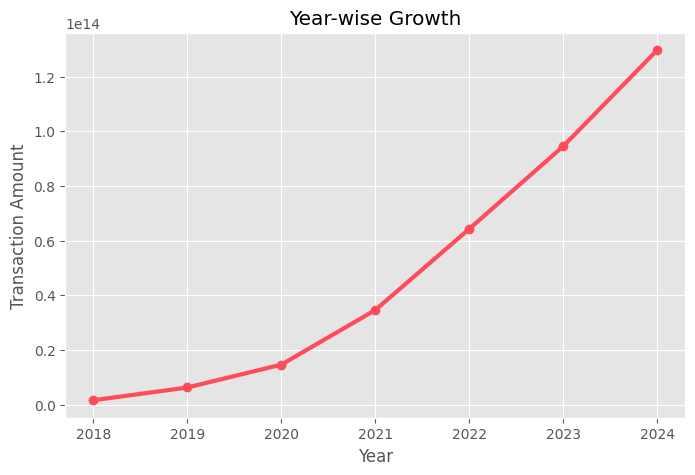

In [ ]:
# ---------------- YEAR-WISE GROWTH ----------------
year_growth = (
    df.groupby("year")["transaction_amount"]
    .sum()
    .sort_index()
)

print("\nYear-wise Growth:")
print(year_growth)

year_growth.plot(
    kind="line",
    marker="o",
    linewidth=3,
    color="#ff4b5c",   # 🎨 Pink/Red
    title="Year-wise Growth",
    figsize=(8,5)
)

plt.xlabel("Year")
plt.ylabel("Transaction Amount")
plt.grid(True)
plt.show()



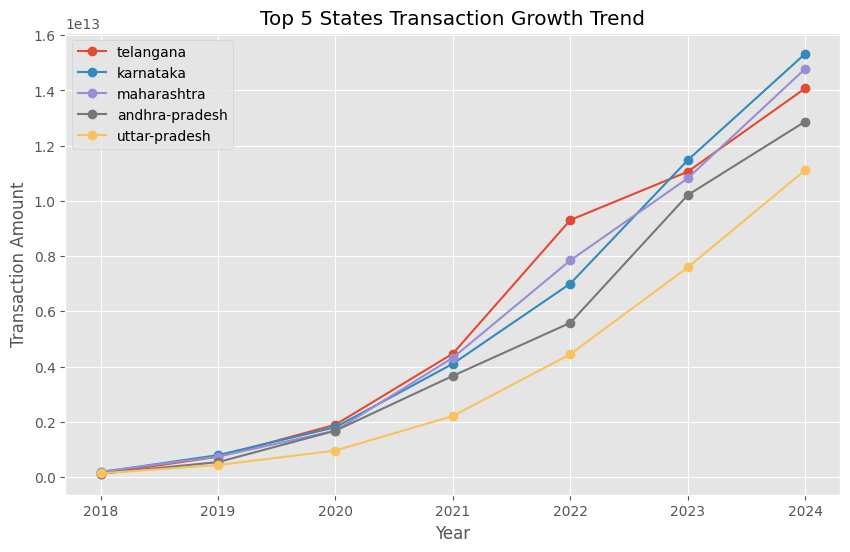

In [26]:
# ---------------- STATE-YEAR GROWTH CHART ----------------
# Get top 5 states by total transaction
top5_states = (
    df.groupby("state")["transaction_amount"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

state_year_top5 = state_year[state_year["state"].isin(top5_states)]

plt.figure(figsize=(10,6))

for state in top5_states:
    data = state_year_top5[state_year_top5["state"] == state]
    plt.plot(data["year"], data["transaction_amount"], marker="o", label=state)

plt.title("Top 5 States Transaction Growth Trend")
plt.xlabel("Year")
plt.ylabel("Transaction Amount")
plt.legend()
plt.grid(True)
plt.show()



Declining States:
          state  year        Growth
40   chandigarh  2023 -2.195069e+10
152     manipur  2023 -3.661675e+10


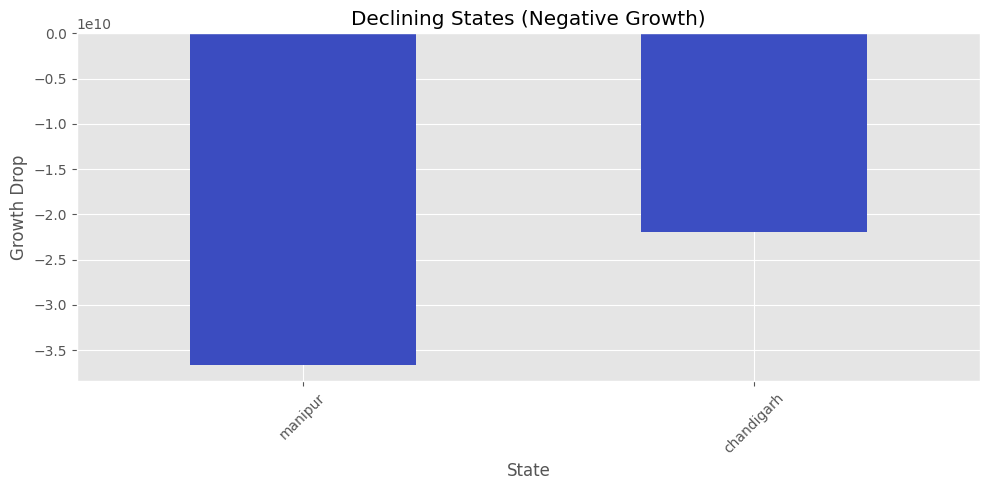

In [28]:
# ---------------- DECLINING STATES ----------------
state_year = state_year.sort_values(["state","year"])
state_year["Prev"] = state_year.groupby("state")["transaction_amount"].shift(1)
state_year["Growth"] = state_year["transaction_amount"] - state_year["Prev"]

decline = state_year[state_year["Growth"] < 0]

print("\nDeclining States:")
print(decline[["state","year","Growth"]])

# 🎨 Decline Chart
if not decline.empty:
    decline_states = decline.groupby("state")["Growth"].sum().sort_values()

    decline_states.plot(
        kind="bar",
        color=plt.cm.coolwarm(range(len(decline_states))),
        title="Declining States (Negative Growth)",
        figsize=(10,5)
    )

    plt.xlabel("State")
    plt.ylabel("Growth Drop")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No declining states found ✅")


In [ ]:
##case study4 . Insurance Engagement Analysis
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt

# ---------------- DATABASE ----------------
mydb = psycopg2.connect(
    host="localhost",
    database="phonepe_data",
    user="postgres",
    password="root",
    port="5432"
)

df = pd.read_sql("SELECT * FROM aggregated_Insurance", mydb)
conn.close()

print("Insurance Data Loaded ✅")
print(df.head())

Insurance Data Loaded ✅
                       state  year  quarter  from_timestamp   to_timestamp  \
0  andaman-&-nicobar-islands  2020        2   1585679400000  1593282600000   
1  andaman-&-nicobar-islands  2020        3   1593541800000  1601231400000   
2  andaman-&-nicobar-islands  2020        4   1601490600000  1609093800000   
3  andaman-&-nicobar-islands  2021        1   1609439400000  1616869800000   
4  andaman-&-nicobar-islands  2021        2   1617215400000  1624818600000   

  insurance_type  insurance_count  insurance_amount  
0      Insurance                6            1360.0  
1      Insurance               41           15380.0  
2      Insurance              124          157975.0  
3      Insurance              225          244266.0  
4      Insurance              137          181504.0  


C:\Users\Lavanyasathish\AppData\Local\Temp\ipykernel_21272\713954998.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM aggregated_Insurance", mydb)



Top Insurance States:
state
karnataka        2.743155e+09
maharashtra      2.363129e+09
uttar-pradesh    1.740346e+09
tamil-nadu       1.555507e+09
kerala           1.313719e+09
telangana        1.171060e+09
west-bengal      1.052463e+09
rajasthan        9.596539e+08
haryana          8.309812e+08
delhi            8.153652e+08
Name: insurance_amount, dtype: float64


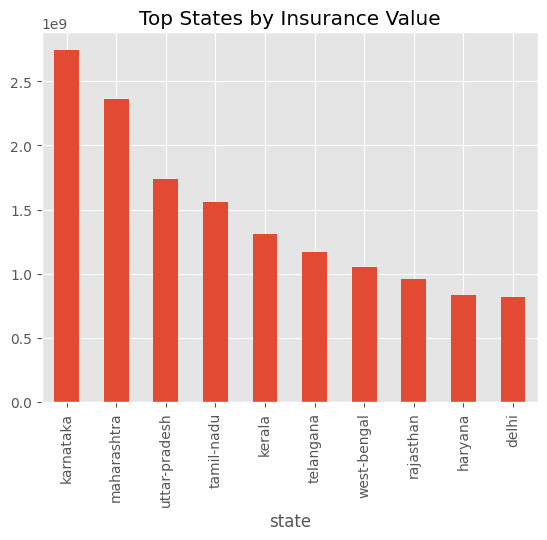

In [36]:
# ---------------- TOP STATES ----------------
top_states = (
    df.groupby("state")["insurance_amount"]
    .sum()
    .sort_values(ascending=False)
)

print("\nTop Insurance States:")
print(top_states.head(10))

top_states.head(10).plot(kind="bar", title="Top States by Insurance Value")
plt.show()


Year Growth:
year
2020    2.942072e+08
2021    1.499170e+09
2022    4.238843e+09
2023    6.056606e+09
2024    7.926752e+09
Name: insurance_amount, dtype: float64


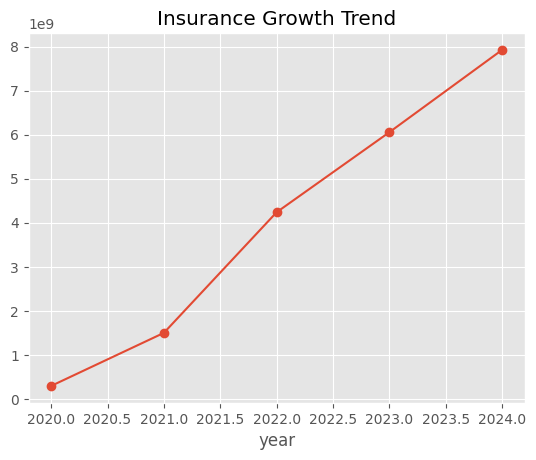

In [37]:
# ---------------- YEAR-WISE GROWTH ----------------
year_growth = (
    df.groupby("year")["insurance_amount"]
    .sum()
    .sort_index()
)

print("\nYear Growth:")
print(year_growth)

year_growth.plot(marker="o", title="Insurance Growth Trend")
plt.show()


Insurance Type Performance:
insurance_type
Insurance    2.001558e+10
Name: insurance_amount, dtype: float64


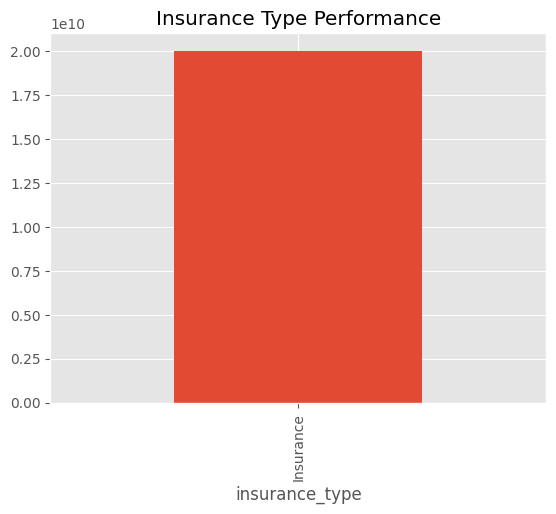

In [39]:
# ---------------- INSURANCE TYPE ----------------
type_perf = (
    df.groupby("insurance_type")["insurance_amount"]
    .sum()
    .sort_values(ascending=False)
)

print("\nInsurance Type Performance:")
print(type_perf)

type_perf.plot(kind="bar", title="Insurance Type Performance")
plt.show()

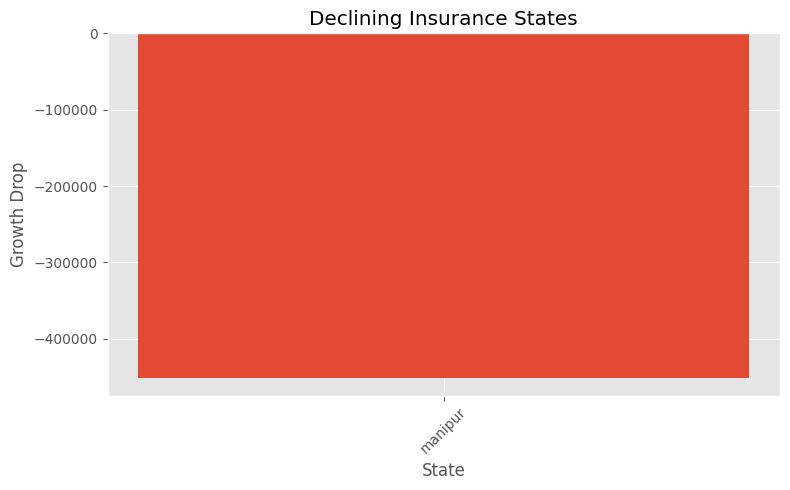

In [42]:
# ---------------- DECLINE DETECTION ----------------

import matplotlib.pyplot as plt

# Sum of decline per state
decline_sum = (
    decline.groupby("state")["Growth"]
    .sum()
)

plt.figure(figsize=(8,5))

plt.bar(decline_sum.index, decline_sum.values)

plt.title("Declining Insurance States")
plt.xlabel("State")
plt.ylabel("Growth Drop")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



User Data Loaded ✅


C:\Users\Lavanyasathish\AppData\Local\Temp\ipykernel_21272\4061980252.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM Agg_user", conn)


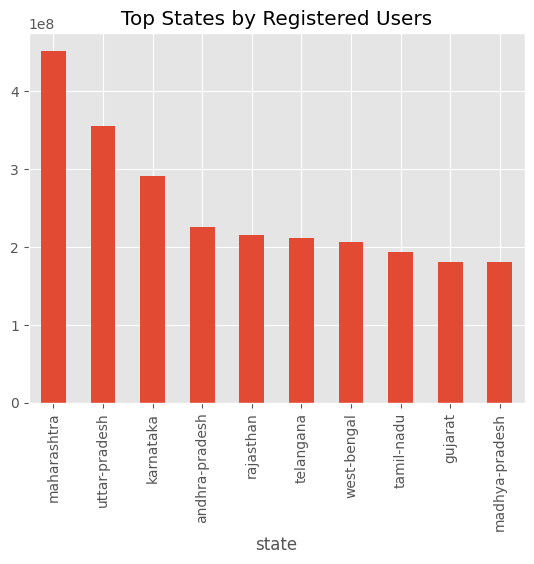

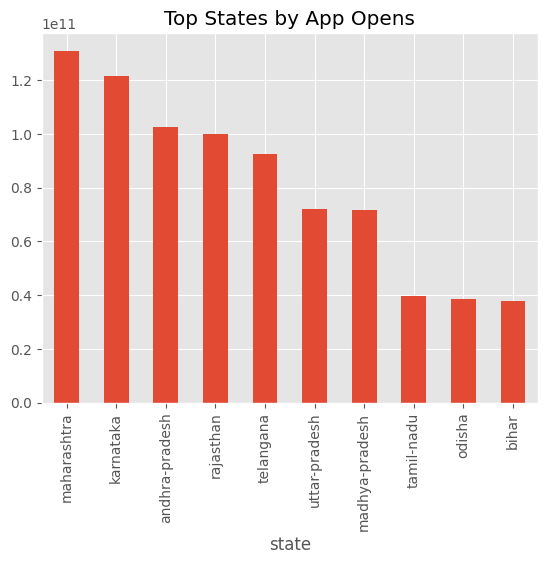

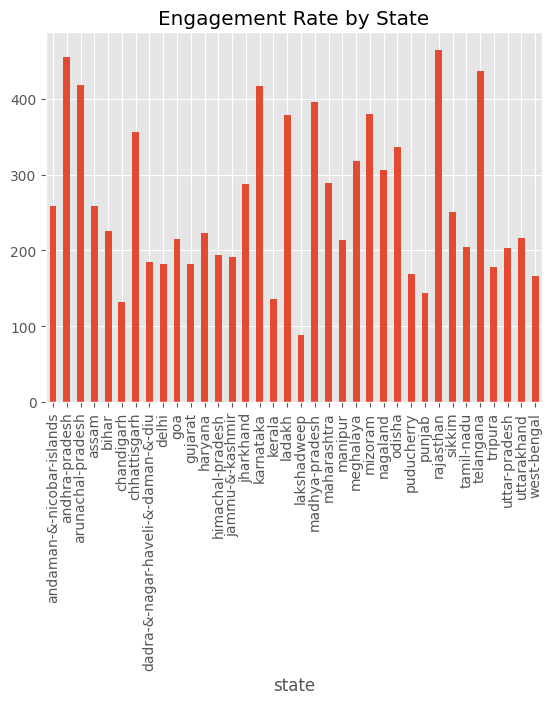

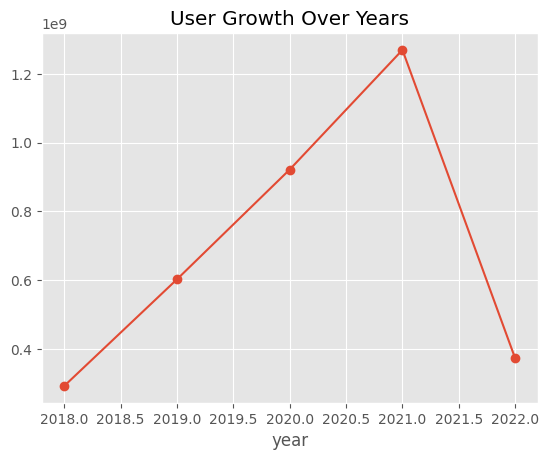

In [65]:
#case study5. Insurance Penetration and Growth Potential Analysis
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt

conn = psycopg2.connect(
    host="localhost",
    database="phonepe_data",
    user="postgres",
    password="root",
    port="5432"
)

df = pd.read_sql("SELECT * FROM Agg_user", conn)
conn.close()

print("User Data Loaded ✅")

# ---------------- TOP STATES USERS ----------------
top_users = (
    df.groupby("state")["registered_users"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_users.plot(kind="bar", title="Top States by Registered Users")
plt.show()


# ---------------- APP OPENS ----------------
top_opens = (
    df.groupby("state")["app_opens"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_opens.plot(kind="bar", title="Top States by App Opens")
plt.show()


# ---------------- ENGAGEMENT RATE ----------------
eng = df.groupby("state")[["registered_users","app_opens"]].sum()
eng["rate"] = eng["app_opens"] / eng["registered_users"]

eng["rate"].plot(kind="bar", title="Engagement Rate by State")
plt.show()


# ---------------- USER GROWTH ----------------
growth = (
    df.groupby("year")["registered_users"]
    .sum()
)

growth.plot(marker="o", title="User Growth Over Years")
plt.show()


In [ ]:
create_table_query_1= '''
CREATE TABLE IF NOT EXISTS Agg_transaction (
    state VARCHAR(50),
    year VARCHAR(10),
    quarter VARCHAR(10),
    Transaction_type VARCHAR(50),
    Transaction_count BIGINT,
    Transaction_amount BIGINT
)
'''
cursor.execute(create_table_query_1)
mydb.commit()

insert_query_1 = '''
INSERT INTO Agg_transaction (state, year, quarter, Transaction_type, Transaction_count, Transaction_amount
) VALUES (%s, %s, %s, %s, %s, %s)
'''
cursor.executemany(insert_query_1, Agg_Transaction.values.tolist())
mydb.commit()

print("✅ Data inserted successfully")

    




In [ ]:
# Create table (correct data types for PostgreSQL)
create_table_query = '''
CREATE TABLE IF NOT EXISTS aggregated_insurance (
    state VARCHAR(50),
    year INT,
    quarter INT,
    from_timestamp BIGINT,
    to_timestamp BIGINT,
    insurance_type VARCHAR(100),
    insurance_count BIGINT,
    insurance_amount DOUBLE PRECISION
)
'''
cursor.execute(create_table_query)
mydb.commit()

# Insert data into table
insert_query = '''
INSERT INTO aggregated_insurance
(state, year, quarter, from_timestamp, to_timestamp,
 insurance_type, insurance_count, insurance_amount)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s)
'''

data = Agg_Insurance.values.tolist()

cursor.executemany(insert_query, data)
mydb.commit()

print("✅ Data inserted successfully")


✅ Data inserted successfully


In [6]:
create_table_query = '''
CREATE TABLE IF NOT EXISTS Agg_user (
    state VARCHAR(50),
    year INT,
    quarter INT,
    brand VARCHAR(50),
    registered_users BIGINT,
    app_opens BIGINT,
    percentage DOUBLE PRECISION
)
'''
cursor.execute(create_table_query)
mydb.commit()

print("✅ Table created successfully")


✅ Table created successfully


In [5]:
insert_query = '''
INSERT INTO Agg_user (
    state,
    year,
    quarter,
    brand,
    registered_users,
    app_opens,
    percentage
)
VALUES (%s, %s, %s, %s, %s, %s, %s)
'''

# Keep columns in correct order
Agg_user = Agg_user[[
    "State",
    "Year",
    "Quarter",
    "Brand",
    "Registered_Users",
    "App_Opens",
    "Percentage"
]].fillna(0)

# Convert datatypes
Agg_user["Year"] = Agg_user["Year"].astype(int)
Agg_user["Quarter"] = Agg_user["Quarter"].astype(int)
Agg_user["Registered_Users"] = Agg_user["Registered_Users"].astype(int)
Agg_user["App_Opens"] = Agg_user["App_Opens"].astype(int)
Agg_user["Percentage"] = Agg_user["Percentage"].astype(float)

# Convert to tuple list
data = [tuple(row) for row in Agg_user.to_numpy()]

# Insert bulk
cursor.executemany(insert_query, data)
mydb.commit()

print("🔥 Data inserted successfully")


🔥 Data inserted successfully


In [ ]:
# Create table
create_table_query_4 = """
CREATE TABLE map_transaction_hover(
    year INT,
    quarter INT,
    state VARCHAR(10),
    district VARCHAR(10),
    transaction_count VARCHAR(20),
    transaction_amount VARCHAR(20)
);
"""
   

# Insert data
insert_query_4 = """
INSERT INTO map_transaction_hover
(state, year, quarter, district, transaction_count, transaction_amount)
VALUES (%s, %s, %s, %s, %s, %s)
"""

data = Map_Transaction_Hover.values.tolist()
cursor.executemany(insert_query_4, data)
mydb.commit()
print("✅ Data inserted successfully")
    




✅ Data inserted successfully


In [ ]:
create_table_query_5 = """
CREATE TABLE IF NOT EXISTS map_user_hover(
    year INT,
    quarter INT,
    state VARCHAR(50),
    district VARCHAR(100),
    registered_users BIGINT,
    app_opens BIGINT
)
"""
cursor.execute(create_table_query_5)
mydb.commit()
print("✅ Table created")


✅ Table created


In [ ]:


insert_query_5 = '''
INSERT INTO Map_User_Hover 
(state,year,quarter,district, Registered_Users, App_Opens)
VALUES (%s, %s, %s, %s, %s, %s)
'''
data = Map_User_Hover.values.tolist()
cursor.executemany(insert_query_5, data)
mydb.commit()
print("✅ Data inserted successfully")  


✅ Data inserted successfully


In [ ]:
create_table_query_6 = '''
CREATE TABLE IF NOT EXISTS Map_Insurance_Hover (
    year VARCHAR(10),
    quarter VARCHAR(10),
    state VARCHAR(50),
    district VARCHAR(100),
    insurance_count BIGINT,
    insurance_amount BIGINT
)
'''
insert_query_6 = '''
INSERT INTO Map_Insurance_Hover (year, quarter, state, district, insurance_count,
insurance_amount)
VALUES (%s, %s, %s, %s, %s, %s)
'''
cursor.execute(create_table_query_6)
mydb.commit()


In [ ]:
create_table_query_7 = """
CREATE TABLE IF NOT EXISTS top_transactions (
    id SERIAL PRIMARY KEY,
    state VARCHAR(100),
    year INT,
    quarter INT,
    level VARCHAR(20),          -- State / District / Pincode
    entity_name VARCHAR(150),   -- District name OR Pincode OR NULL for state
    transaction_count BIGINT,
    transaction_amount DOUBLE PRECISION
);
"""

cursor.execute(create_table_query_7)
mydb.commit()
print("Table created successfully ✅")

insert_query_7 = """
INSERT INTO top_transactions (state, year, quarter, level, entity_name, transaction_count, transaction_amount)
VALUES (%s, %s, %s, %s, %s, %s, %s)
"""
data = []
for _, row in Top_States.iterrows():
    data.append((row['State'], row['Year'], row['Quarter'], 'State', None, row['Transaction_Count'], row['Transaction_Amount']))    
for _, row in Top_Districts.iterrows():
    data.append((row['State'], row['Year'], row['Quarter'], 'District', row['District'], row['Transaction_Count'], row['Transaction_Amount']))
for _, row in Top_Pincodes.iterrows():
    data.append((row['State'], row['Year'], row['Quarter'], 'Pincode', row['Pincode'], row['Transaction_Count'], row['Transaction_Amount']))
cursor.executemany(insert_query_7, data)
mydb.commit()
print("Data inserted successfully ✅")  

Table created successfully ✅
Data inserted successfully ✅


In [ ]:
create_table_query_8 = """
CREATE TABLE IF NOT EXISTS top_users (
    id SERIAL PRIMARY KEY,
    state VARCHAR(100),
    year INT,
    quarter INT,
    level VARCHAR(20),          -- State / District / Pincode
    entity_name VARCHAR(150),   -- District name OR Pincode OR NULL for state
    registered_users BIGINT
);
"""
cursor.execute(create_table_query_8)
mydb.commit()
print("Table created successfully ✅")
insert_query_7 = """
INSERT INTO top_users (state, year, quarter, level, entity_name, registered_users)
VALUES (%s, %s, %s, %s, %s, %s)
"""
data = []
for _, row in Top_User_States.iterrows():
    data.append((row['State'], row['Year'], row['Quarter'], 'State', None, row['Registered_Users']))    
for _, row in Top_User_Districts.iterrows():
    data.append((row['State'], row['Year'], row['Quarter'], 'District', row['District'], row['Registered_Users']))
for _, row in Top_User_Pincodes.iterrows():
    data.append((row['State'], row['Year'], row['Quarter'], 'Pincode', row['Pincode'], row['Registered_Users']))
cursor.executemany(insert_query_7, data)
mydb.commit()
print("Data inserted successfully ✅")


Table created successfully ✅
Data inserted successfully ✅


In [ ]:
create_table_query_9 = """
CREATE TABLE IF NOT EXISTS top_insurance (
    id SERIAL PRIMARY KEY,
    state VARCHAR(100),
    year INT,
    quarter INT,
    level VARCHAR(20),          -- State / District / Pincode
    entity_name VARCHAR(150),   -- District name OR Pincode OR NULL for state
    insurance_count BIGINT,
    insurance_amount DOUBLE PRECISION
);
"""
cursor.execute(create_table_query_9)
mydb.commit()
print("Table created successfully ✅")
insert_query_9 = """
INSERT INTO top_insurance (state, year, quarter, level, entity_name, insurance_count, insurance_amount)
VALUES (%s, %s, %s, %s, %s, %s,
%s)
"""
data = []
for _, row in Top_Insurance_States.iterrows():
    data.append((row['State'], row['Year'], row['Quarter'], 'State', None, row['Insurance_Count'], row['Insurance_Amount']))
for _, row in Top_Insurance_Districts.iterrows():
    data.append((row['State'], row['Year'], row['Quarter'], 'District', row['District'], row['Insurance_Count'], row['Insurance_Amount']))  
for _, row in Top_Insurance_Pincodes.iterrows():
    data.append((row['State'], row['Year'], row['Quarter'], 'Pincode', row['Pincode'], row['Insurance_Count'], row['Insurance_Amount']))
cursor.executemany(insert_query_9, data)
mydb.commit()
print("Data inserted successfully ✅")

Table created successfully ✅
Data inserted successfully ✅


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed